<a href="https://colab.research.google.com/github/MrR8bot/MLandAI/blob/master/Asset_Model_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting Stock Price

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install cryptocmd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install markupsafe==2.0.1



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#Import the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pycaret.regression import *
import yfinance as yf

In [7]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cryptocmd import CmcScraper

Financial Technical Analysis Indicators

https://github.com/peerchemist/finta

In [25]:
"""
Defining some constants for data mining
"""

NUM_DAYS = 100000     # The number of days of historical data to retrieve
INTERVAL = '1d'     # Sample rate of historical data
symbol = 'TSLA'      # Symbol of the desired stock. (e.g. GE, VOO. Vanguard 500 Index Fund ETF, )
currency = ''
crypto  = ''

# List of symbols for technical indicators
INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX']

Pull asset historical data from YFinance and normlize the data

[*********************100%***********************]  1 of 1 completed
                open      high       low     Close  Adj Close     volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


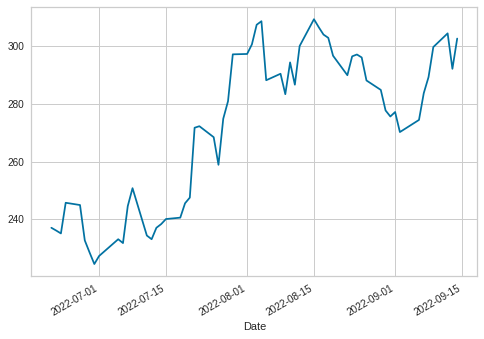

In [27]:
"""
Next we pull the historical data using yfinance
Rename the column names because finta uses the lowercase names
"""

start = (datetime.date.today() - datetime.timedelta( NUM_DAYS ) )
end = datetime.datetime.today()

stockdata = yf.download(symbol, start=start, end=end, interval=INTERVAL)
stockdata.rename(columns={"Close": 'Close', "High": 'high', "Low": 'low', 'Volume': 'volume', 'Open': 'open'}, inplace=True)
print(stockdata.head())

tmp = stockdata.iloc[-60:]
tmp['Close'].plot()

In [28]:
#Call function to get BTC historical data (It can be change to other Assets, e.g. ETH)
scraper = CmcScraper('ETH')

In [29]:
#Get dataframe
cryptodata = scraper.get_dataframe()

In [30]:
#Load the data set
#from google.colab import files
#files.upload()

Uncomment if want to do manual upload.

In [31]:
#Read in the data and store it into a variable
#asset = pd.read_csv('BTC-USD.csv')
#Show the data
#asset

Select here if the analysis is for a Crypto Asset or Stock

In [32]:
#A variable for predicting 1 day out into the future
#uncomment if you want cryptodata analysis
#asset = cryptodata
asset = stockdata
future_days =1
#Create a new column (the target or dependant variable) shifted 'n' unit up, in this case n=1
asset['Future_Price'] = asset[['Close']].shift(-future_days)

#Choose the columns to keep
asset = asset[['Close','Future_Price']]

#Show the data
asset

,Close,Future_Price
Date,,
2010-06-29,1.592667,1.588667
2010-06-30,1.588667,1.464000
2010-07-01,1.464000,1.280000
2010-07-02,1.280000,1.074000
2010-07-06,1.074000,1.053333
...,...,...
2022-09-08,289.260010,299.679993
2022-09-09,299.679993,304.420013
2022-09-12,304.420013,292.130005


In [33]:
#Make a copy of the data set

df = asset.copy()

#Create the independent data set

X = np.array(df[df.columns])

#Remove the last 'n' rows from the data set where 'n' is the future_Days=1
X = X[:len(asset)-future_days]

#Create the dependent data set (y) and convert the dataframe to a numpy array

y = np.array(df['Future_Price'])

#Get all the y values except for the last 'n; rows which is the future_Days =1

y = y[:-future_days]

#Split the data into a 85% training data set and a 15% testing data set

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state = 0, shuffle=False)


In [34]:
#Get the train data and transform it to a dataframe
train_data = pd.DataFrame(x_train, columns = df.columns)
#Show the first 7 rows of data

train_data.head(7)

,Close,Future_Price
0,1.592667,1.588667
1,1.588667,1.464000
2,1.464000,1.280000
3,1.280000,1.074000
4,1.074000,1.053333
5,1.053333,1.164000
6,1.164000,1.160000


In [35]:
#Get the test data and transfor into a dataframe
test_data = pd.DataFrame(x_test, columns = df.columns)

test_data.head(7)

,Close,Future_Price
0,139.043335,137.253326
1,137.253326,136.166672
2,136.166672,136.029999
3,136.029999,147.203339
4,147.203339,162.213333
5,162.213333,166.423340
6,166.423340,163.203339


In [36]:
#Initialize the setup
regression_setup = setup(data=train_data, target = 'Future_Price', session_id=123, use_gpu = True)

,Description,Value
0,session_id,123
1,Target,Future_Price
2,Original Data,"(2612, 2)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1828, 1)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='Future_Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Make sure that you hit enter when ask the question for complete the step.

In [37]:
# Train on all of the models and sort it by the R-squared metric aka (r2) and store the model with the best r2 score
best_model = compare_models(sort='r2')



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.4911,2.2365,1.4480,0.9958,0.0300,0.0235,0.017
lasso,Lasso Regression,0.4966,2.2640,1.4565,0.9957,0.0308,0.0254,0.012
ridge,Ridge Regression,0.4942,2.2630,1.4551,0.9957,0.0302,0.0242,0.014
en,Elastic Net,0.4966,2.2640,1.4565,0.9957,0.0308,0.0254,0.047
lar,Least Angle Regression,0.4942,2.2630,1.4551,0.9957,0.0302,0.0242,0.012
omp,Orthogonal Matching Pursuit,0.4942,2.2630,1.4551,0.9957,0.0302,0.0242,0.027
br,Bayesian Ridge,0.4942,2.2630,1.4551,0.9957,0.0302,0.0242,0.010
lr,Linear Regression,0.4942,2.2630,1.4551,0.9957,0.0302,0.0242,0.012
lightgbm,Light Gradient Boosting Machine,0.5317,2.4369,1.4842,0.9955,0.0351,0.0272,0.065
par,Passive Aggressive Regressor,0.5668,2.6696,1.5729,0.9950,0.0333,0.0284,0.014


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [38]:
# The model with the higher R2 is the Selected Regresor
# Create the model and show its prediction metrics on the training data set
model = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5495,5.5892,2.3642,0.9890,0.0340,0.0252
1,0.3964,1.3264,1.1517,0.9963,0.0254,0.0224
2,0.4004,1.2035,1.0970,0.9956,0.0274,0.0219
3,0.4837,1.6563,1.2870,0.9981,0.0283,0.0213
4,0.4788,1.9570,1.3989,0.9966,0.0327,0.0253
5,0.5343,2.4345,1.5603,0.9955,0.0266,0.0217
6,0.5592,3.0526,1.7472,0.9941,0.0307,0.0235
7,0.5835,2.3806,1.5429,0.9973,0.0327,0.0263
8,0.4211,1.0200,1.0099,0.9978,0.0310,0.0231


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [39]:
#Evaluate the model
evaluate_model(model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [40]:
#Get the predictions 
unseen_predictions = predict_model(model, data=test_data)
#Show the predictions
unseen_predictions

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,7.5431,110.022,10.4891,0.9612,0.0378,0.0282


,Close,Future_Price,Label
0,139.043335,137.253326,139.541119
1,137.253326,136.166672,137.744511
2,136.166672,136.029999,136.653849
3,136.029999,147.203339,136.516672
4,147.203339,162.213333,147.731211
...,...,...,...
457,283.700012,289.260010,284.731186
458,289.260010,299.679993,290.311685
459,299.679993,304.420013,300.770090
460,304.420013,292.130005,305.527588


Diagram of Future Price versus Price

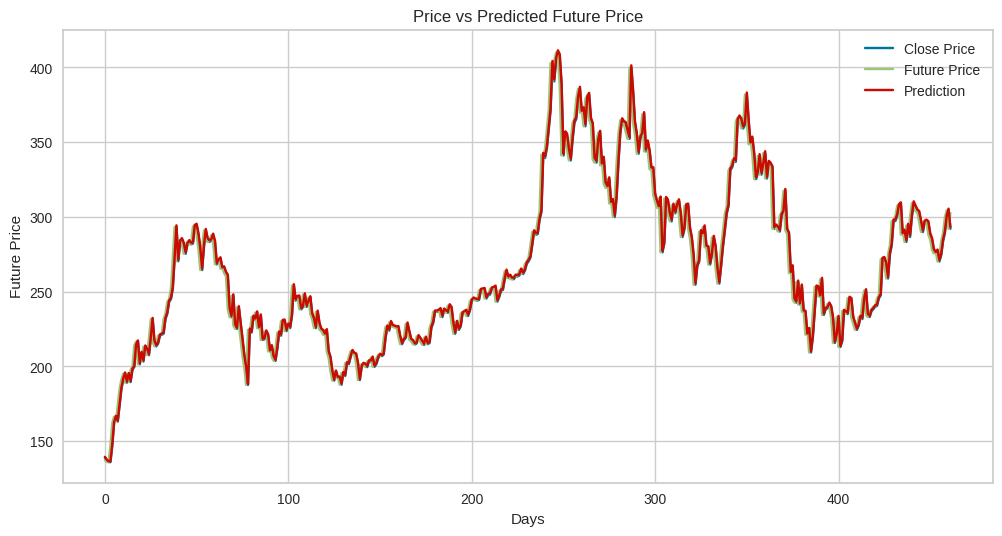

In [41]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(unseen_predictions['Close'], label="Close Price")
plt.plot(unseen_predictions['Future_Price'], label="Future Price")
plt.plot(unseen_predictions['Label'], label="Prediction")
plt.xlabel('Days')
plt.ylabel('Future Price')
plt.title('Price vs Predicted Future Price')
plt.legend()
plt.show()